# Datamining - Clasificación de Clientes VIP vs Normal

Dataset utilizado: Customer Personality Analysis
Este dataset contiene información sobre clientes de una empresa minorista que vende productos como vino, carne, pescado, dulces y oro.


## Importación de librerias y carga de dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('/content/marketing_campaign.csv', sep=',')

# Mostrar información inicial
print("Dimensiones:", df.shape)
print("Columnas con valores nulos:\n", df.isnull().sum())
print("\nColumnas:\n", df.columns)

Dimensiones: (2240, 29)
Columnas con valores nulos:
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Columnas:
 Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProd

## Limpieza de datos

In [ ]:
# Reemplazar nulos en Income con la media
df['Income'] = df['Income'].fillna(df['Income'].mean())
print("Columnas con valores nulos:\n", df.isnull().sum())


# Ver contenido de dataset para verificar correcto remplazo
print("Primeras filas del dataset:")
print(df.head())

print("\nInformación del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

Columnas con valores nulos:
 ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64
Primeras filas del dataset:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  4

## Creación de columna VIP

Se crearon dos nuevas variables:

- Total\_Spent: suma del gasto en vinos, frutas, carnes, pescado, dulces y oro, como indicador del nivel de consumo.

- Total\_Purchases: suma de compras por internet, catálogo y tienda física, como medida de actividad.

Dado que el dataset no incluye una etiqueta VIP, estas variables se usaron como base para generar una clasificación VIP en pasos posteriores.

In [ ]:
# Crear columna de gasto total
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + \
                     df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
print("Total_Spent (primeras filas):")
print(df['Total_Spent'].head())

# Crear columna de frecuencia total de compras
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
print("\nTotal_Purchases (primeras filas):")
print(df['Total_Purchases'].head())

Total_Spent (primeras filas):
0    1617
1      27
2     776
3      53
4     422
Name: Total_Spent, dtype: int64

Total_Purchases (primeras filas):
0    22
1     4
2    20
3     6
4    14
Name: Total_Purchases, dtype: int64


Para etiquetar a los clientes como "VIP" o "NORMAL", se establecieron dos criterios:

Total_Spent superior al percentil 75: identifica a quienes gastan más que el 75 % de los clientes.

Total_Purchases superior al promedio: selecciona a quienes compran con mayor frecuencia que la media.

Con base en estos umbrales, se creó una nueva columna llamada CATEGORIA. Los clientes que cumplen ambos criterios se clasifican como "VIP"; el resto, como "NORMAL".

In [ ]:
# Definir clientes VIP (percentil 75 de gasto y compras por encima de la media)
spent_threshold = df['Total_Spent'].quantile(0.75)
purchase_threshold = df['Total_Purchases'].mean()
print(f"\nUmbral para VIP - Gasto (percentil 75): {spent_threshold:.2f}")
print(f"Umbral para VIP - Compras (media): {purchase_threshold:.2f}")

# Crear columna 'CATEGORIA'
df['CATEGORIA'] = np.where((df['Total_Spent'] > spent_threshold) &
                      (df['Total_Purchases'] > purchase_threshold), 'VIP', 'NORMAL')

print("\nEjemplos de clasificación de VIP (primeras filas):")
print(df[['Total_Spent', 'Total_Purchases', 'CATEGORIA']].head())


Umbral para VIP - Gasto (percentil 75): 1045.50
Umbral para VIP - Compras (media): 12.54

Ejemplos de clasificación de VIP (primeras filas):
   Total_Spent  Total_Purchases CATEGORIA
0         1617               22       VIP
1           27                4    NORMAL
2          776               20    NORMAL
3           53                6    NORMAL
4          422               14    NORMAL


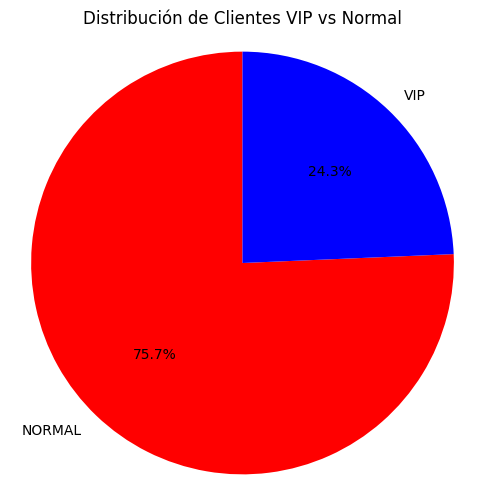

Cantidad de clientes por categoría:
 CATEGORIA
NORMAL    1695
VIP        545
Name: count, dtype: int64


In [ ]:
# Contar cuántos clientes hay en cada categoría
vip_counts = df['CATEGORIA'].value_counts()

# Gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(vip_counts,
        labels=vip_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['red', 'blue'])

plt.title('Distribución de Clientes VIP vs Normal')
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.show()
print("Cantidad de clientes por categoría:\n", vip_counts)

## Selección de características (features) para el modelo


Se creó una nueva variable llamada Age restando el año de nacimiento del cliente al año 2025 para determinar la edad del cliente.

Luego, se seleccionaron tres características para entrenar el modelo:
- Income: ingreso anual del cliente
- Age: edad calculada
- NumWebVisitsMonth: número de visitas al sitio web en el último mes

In [ ]:
# Calcula edad (mejor que año de nacimiento)
df['Age'] = 2025 - df['Year_Birth']

features = ['Income', 'Age', 'NumWebVisitsMonth']
X = df[features]
y = df['CATEGORIA']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

Tamaño del conjunto de entrenamiento: 1792 muestras
Tamaño del conjunto de prueba: 448 muestras


## Modelo

### Modelo de Regresión Logística
Se creó un modelo de Regresión Logística con un máximo de 1000 iteraciones y semilla fija para reproducibilidad

In [ ]:
## Modelo de Regresión Logística
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predecir y evaluar
y_pred_logreg = logreg.predict(X_test)

print("\n--- Resultados Regresión Logística ---")
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_logreg):.2%}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_logreg))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_logreg))


--- Resultados Regresión Logística ---
Exactitud (Accuracy): 83.71%

Reporte de Clasificación:
              precision    recall  f1-score   support

      NORMAL       0.87      0.92      0.89       329
         VIP       0.73      0.61      0.66       119

    accuracy                           0.84       448
   macro avg       0.80      0.76      0.78       448
weighted avg       0.83      0.84      0.83       448


Matriz de Confusión:
[[303  26]
 [ 47  72]]


**Exactitud (Accuracy): 83.71%**
El modelo clasifica correctamente al 84% de los clientes en total.

**El reporte muestra qué tan bien funciona el modelo para cada clase:**

* **Precision**: Porcentaje de predicciones correctas dentro de cada clase (87% para NORMAL, 73% para VIP).
* **Recall**: Porcentaje de casos reales detectados correctamente (92% NORMAL, 61% VIP).
* **F1-score**: Balance entre precision y recall; mejor si está cerca de 1 (0.89 NORMAL, 0.66 VIP).
* **Support**: Cantidad de casos reales en cada clase (329 NORMAL, 119 VIP).

**La matriz de confusión muestra:**

* **303**: Clientes normales correctamente clasificados como normales (verdaderos positivos para NORMAL).
* **26**: Clientes normales clasificados erróneamente como VIP (falsos positivos para VIP).
* **47**: Clientes VIP clasificados erróneamente como normales (falsos negativos para VIP).
* **72**: Clientes VIP correctamente clasificados como VIP (verdaderos positivos para VIP).

El modelo acertó con **303 normales** y **72 VIP**.
Se equivocó **26 veces** llamando VIP a un cliente normal y **47 veces** clasificando VIP como normal.

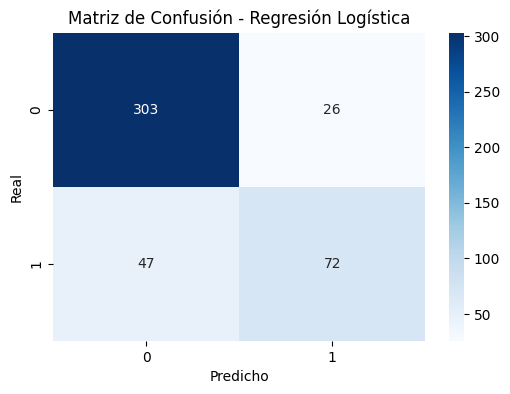

In [ ]:
# Visualizar matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg),
            annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

### Modelo de Regresión Logística
Se entrenó un modelo de Árbol de Decisión con profundidad máxima de 5 y semilla fija para asegurar reproducibilidad.

In [ ]:
## Modelo de Árbol de Decisión
dtree = DecisionTreeClassifier(random_state=42, max_depth=5)
dtree.fit(X_train, y_train)

# Predecir y evaluar
y_pred_dtree = dtree.predict(X_test)

print("\n--- Resultados Árbol de Decisión ---")
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_dtree):.2%}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_dtree))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_dtree))


--- Resultados Árbol de Decisión ---
Exactitud (Accuracy): 85.04%

Reporte de Clasificación:
              precision    recall  f1-score   support

      NORMAL       0.90      0.90      0.90       329
         VIP       0.72      0.71      0.72       119

    accuracy                           0.85       448
   macro avg       0.81      0.81      0.81       448
weighted avg       0.85      0.85      0.85       448


Matriz de Confusión:
[[296  33]
 [ 34  85]]


**Exactitud (Accuracy): 85.04%%**
El modelo clasifica correctamente al 85% de los clientes en total.

**El reporte muestra qué tan bien funciona el modelo para cada clase:**

* **Precision**: Porcentaje de predicciones correctas dentro de cada clase (90% para NORMAL, 72% para VIP).
* **Recall**: Porcentaje de casos reales detectados correctamente (90% NORMAL, 71% VIP).
* **F1-score**: Balance entre precision y recall; mejor si está cerca de 1 (0.90 NORMAL, 0.72 VIP).
* **Support**: Cantidad de casos reales en cada clase (329 NORMAL, 119 VIP).

**La matriz de confusión muestra:**
* **296**: Clientes normales correctamente clasificados como normales (verdaderos positivos para NORMAL).
* **33**: Clientes normales clasificados erróneamente como VIP (falsos positivos para VIP).
* **34**: Clientes VIP clasificados erróneamente como normales (falsos negativos para VIP).
* **85**: Clientes VIP correctamente clasificados como VIP (verdaderos positivos para VIP).

El modelo acertó con **296 normales** y **85 VIP**.
Se equivocó **33 veces** llamando VIP a un cliente normal y **34 veces** clasificando VIP como normal.

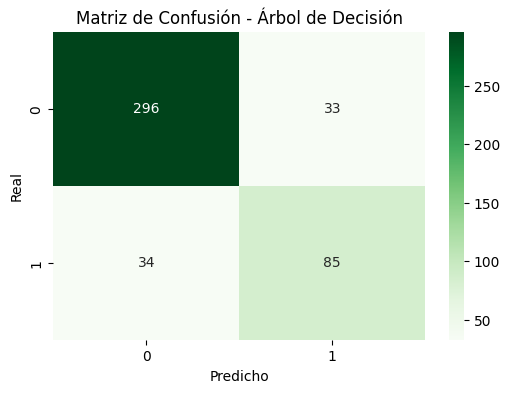

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dtree),
            annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

Se creó una gráfica que muestra la importancia relativa de cada variable utilizada por el modelo de árbol de decisión. Esto significa que se visualiza qué tan decisiva fue cada característica al momento de clasificar a los clientes como VIP o normales. Entre mayor sea el porcentaje en la gráfica, mayor fue la influencia de esa variable en el modelo.










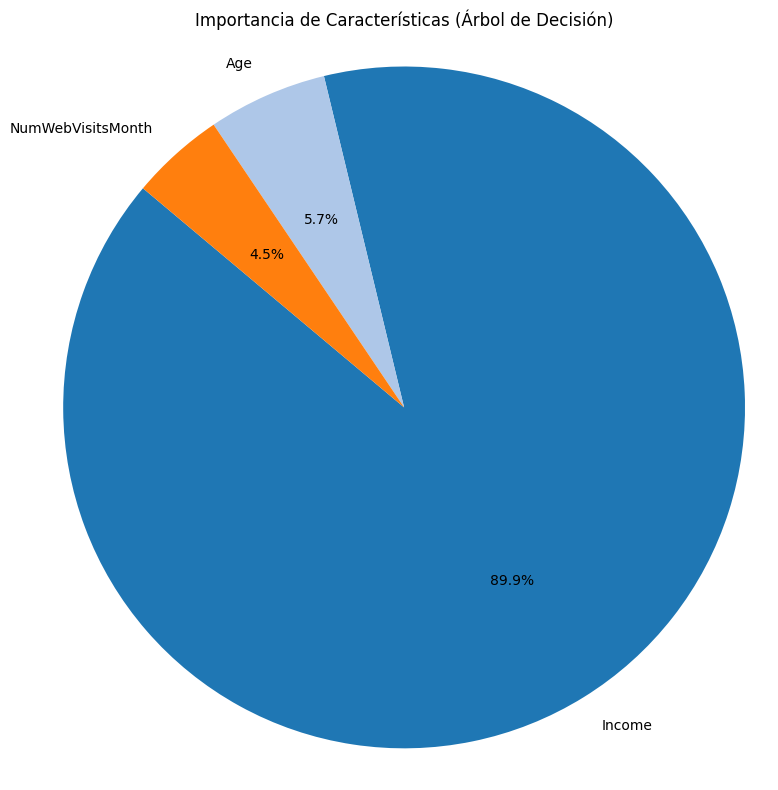

In [ ]:
# Importancia de características
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': dtree.feature_importances_
}).sort_values('Importance', ascending=False)
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(feature_importance['Importance'],
        labels=feature_importance['Feature'],
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.tab20.colors)

plt.title('Importancia de Características (Árbol de Decisión)')
plt.axis('equal')  # Hace el pastel circular
plt.tight_layout()
plt.show()

## INFORME DE RESULTADOS

### PRECISIÓN DE LOS MODELOS

-----------1. PRECISIÓN DE LOS MODELOS------------


<ipython-input-239-6aca13e25024>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modelos, y=precision, palette=['skyblue', 'lightgreen'])


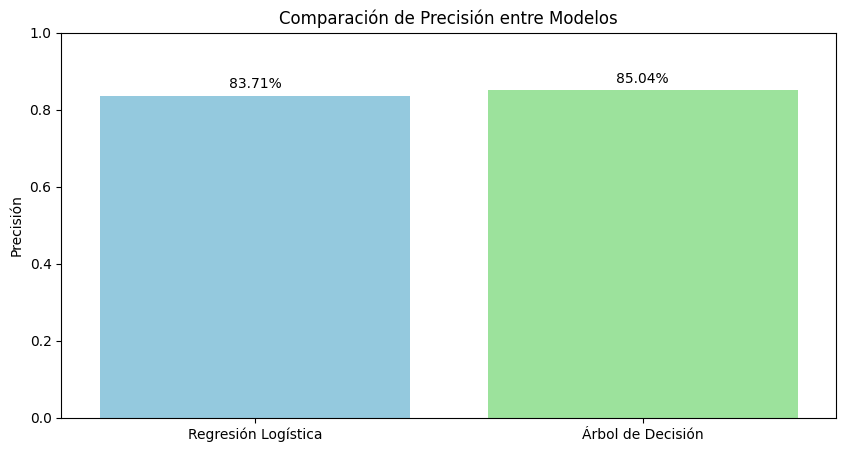

In [ ]:
plt.figure(figsize=(10, 5))
modelos = ['Regresión Logística', 'Árbol de Decisión']
precision = [accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred_dtree)]
sns.barplot(x=modelos, y=precision, palette=['skyblue', 'lightgreen'])
plt.title('Comparación de Precisión entre Modelos')
plt.ylim(0, 1)
plt.ylabel('Precisión')
for i, v in enumerate(precision):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center')
plt.show()

### EJEMPLOS DE CLASIFICACIÓN


In [ ]:
# Resetear índices para evitar problemas
X_test_reset = X_test.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

# Crear DataFrame de ejemplos
ejemplos = pd.DataFrame({
    'Income': X_test_reset['Income'],
    'Age': X_test_reset['Age'],
    'NumWebVisitsMonth': X_test_reset['NumWebVisitsMonth'],
    'Real': y_test_reset,
    'Predicción_LogReg': y_pred_logreg,
    'Predicción_Arbol': y_pred_dtree
}).sample(5, random_state=42)

print(ejemplos.to_string(index=False))

 Income  Age  NumWebVisitsMonth   Real Predicción_LogReg Predicción_Arbol
27213.0   53                  8 NORMAL            NORMAL           NORMAL
63684.0   55                  5    VIP            NORMAL           NORMAL
71952.0   39                  4    VIP               VIP              VIP
36807.0   71                  6 NORMAL            NORMAL           NORMAL
38961.0   52                  7 NORMAL            NORMAL           NORMAL
